In [77]:
import datetime
import pandas as pd
import numpy as np
from pandas._libs.missing import checknull as isna
import json
import matplotlib.pyplot as plt
from fbchat import *
from ipywidgets import widgets

def notna(e):
    return not isna(e)

In [2]:
# Inputs for login details

email = widgets.Text(description='Email:')
password = widgets.Password(description='Password:')
display(email)
display(password)

Text(value='', description='Email:')

Password(description='Password:')

In [3]:
# Create client

print("Logging in...")
try:
    await session.logout()
    print("Logged out of existing session")
except:
    pass
session = await Session.login(email.value, password.value)
client = Client(session=session)
print("Logged in successfully")

Logging in...
Logged in successfully


In [67]:
# Fetch all threads

threads_all = [i async for i in client.fetch_threads(500) if isinstance(i, UserData)]
print("DONE")

DONE


In [70]:
# Filter threads

threads = [t for t in threads_all if t.message_count >= 50]

def get_thread_overview(thread):
    return thread.name + ' [' + str(thread.message_count) + ' messages]'

for thread in threads:
    print(get_thread_overview(thread))

Hendrik Vija [4084 messages]
Silver Sten Kruus [196 messages]
Ott-Kaarel Vään [225 messages]
Georg Rosma [147 messages]
Olaf Seisler [223 messages]
Brigita Maria Raave [100 messages]
Paul Kaasik [1834 messages]
Timmu Õunapuu [79 messages]
Egert Kozlov [785 messages]
Elias Markus Ehasalu [162 messages]
August Raudvassar [156 messages]
Erki Kylaots [172 messages]
Märten Josh Peedimaa [1132 messages]
Artur Avameri [692 messages]
Andres Reintam [243 messages]
Martin Arras [1344 messages]
Andres Aleksander Tammer [4680 messages]
Katriin Käärik [76 messages]
Pille-Riin Kurrikoff [67 messages]
Hugo Cheetham [58 messages]
Agur Sell [57 messages]
Agnes Tuule Nöps [369 messages]
Richard Rees [178 messages]
Robert Pihlar [50 messages]
Markus Leidt [266 messages]
Heigo Ott Kübar [249 messages]
Karl Paul Parmakson [203 messages]
Juhan Oskar Hennoste [80 messages]
Markus Koort [165 messages]
Hendrik Eelmäe [156 messages]
Robert Kiuru [191 messages]
Oleg Koshik [58 messages]
Mart Leo Ruus [99 message

In [72]:
# Fetch message timings

threads_data = {}
for thread in threads:
    print(thread.name)
    messages = [(msg.created_at, msg.author == thread.session.user.id) async for msg in thread.fetch_messages(None)]
    messages.reverse()
    threads_data[thread.name] = messages

print("DONE")

Hendrik Vija
Silver Sten Kruus
Ott-Kaarel Vään
Georg Rosma
Olaf Seisler
Brigita Maria Raave
Paul Kaasik
Timmu Õunapuu
Egert Kozlov
Elias Markus Ehasalu
August Raudvassar
Erki Kylaots
Märten Josh Peedimaa
Artur Avameri
Andres Reintam
Martin Arras
Andres Aleksander Tammer
Katriin Käärik
Pille-Riin Kurrikoff
Hugo Cheetham
Agur Sell
Agnes Tuule Nöps
Richard Rees
Robert Pihlar
Markus Leidt
Heigo Ott Kübar
Karl Paul Parmakson
Juhan Oskar Hennoste
Markus Koort
Hendrik Eelmäe
Robert Kiuru
Oleg Koshik
Mart Leo Ruus
Andreas Jõesaar
Karl Gutmann
Tanel Pastarus
Johannes Sarapuu
Mette Mari Kaljas
Kadi Siigur
Karl Johan Linnas
Richard Pillmann
Elerin Eelmäe
Karla Hiss
Karla Olev
Annemai Mänd
DONE


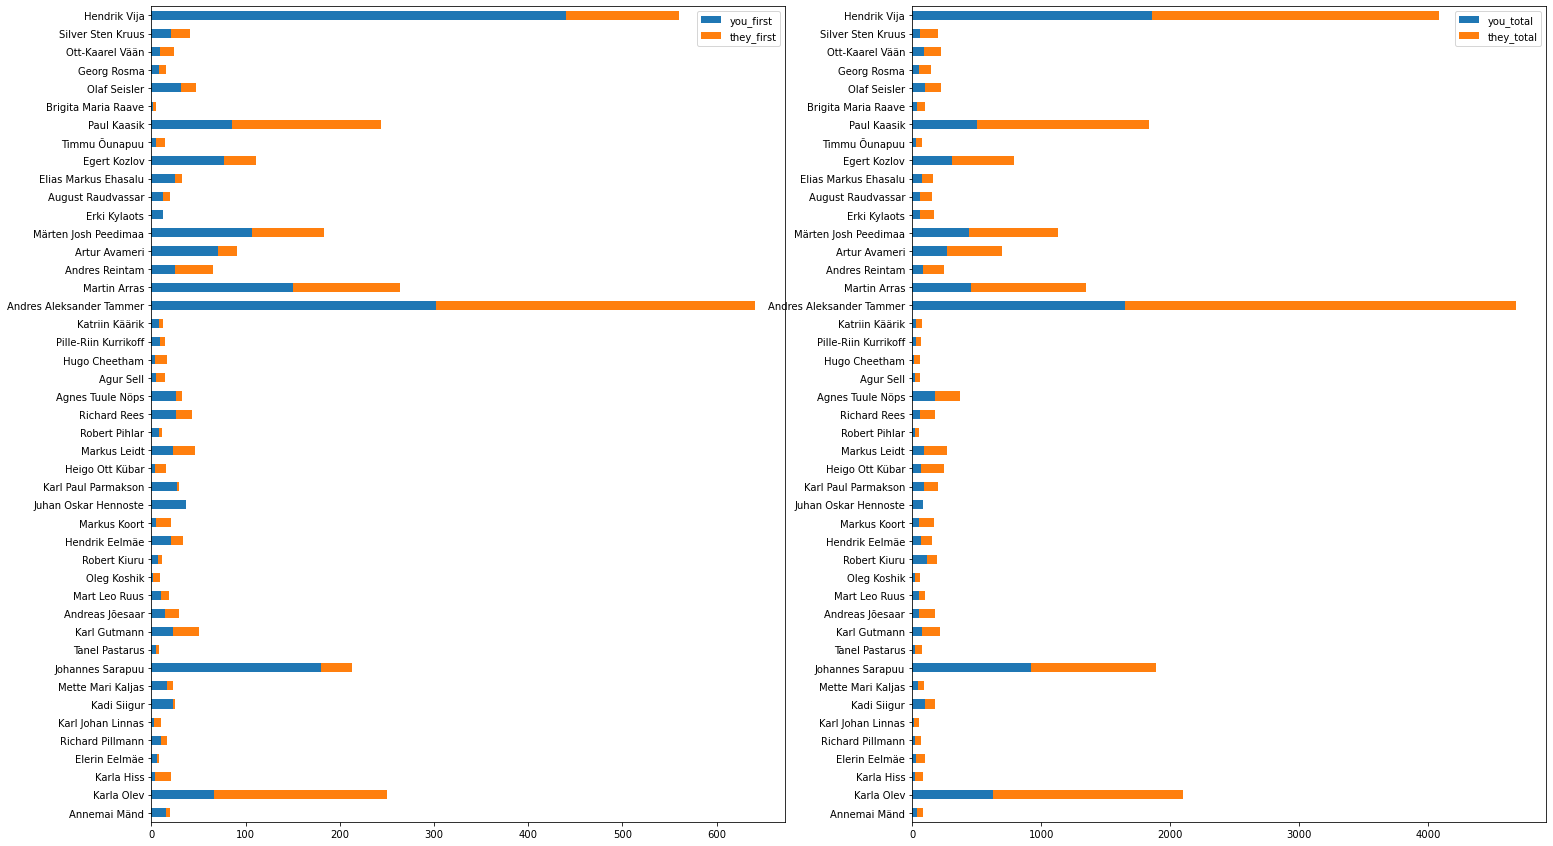

In [110]:
cutoff = datetime.timedelta(hours=4)
def get_message_breakdown(messages):
    you_first = 0
    they_first = 0
    you_total = 0
    they_total = 0
    
    last_time = None
    for message in messages:
        message_time, message_you = message
        
        if (not last_time) or (message_time - last_time >= cutoff):
            you_first += int(message_you)
            they_first += int(not message_you)
        
        you_total += int(message_you)
        they_total += int(not message_you)
        
        last_time = message_time
    
    return {
        'you_first': you_first,
        'they_first': they_first,
        'you_total': you_total,
        'they_total': they_total
    }

breakdowns = pd.DataFrame.from_dict({name: get_message_breakdown(threads_data[name]) for name in threads_data}, 'index')

fig, axs = plt.subplots(1, 2, figsize=(25,15))
breakdowns[['you_first', 'they_first']].plot.barh(ax=axs[0], stacked=True).invert_yaxis()
breakdowns[['you_total', 'they_total']].plot.barh(ax=axs[1], stacked=True).invert_yaxis()